In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [41]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis='columns', inplace=True)

In [42]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [21]:
scaler = MinMaxScaler()

In [43]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

In [44]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


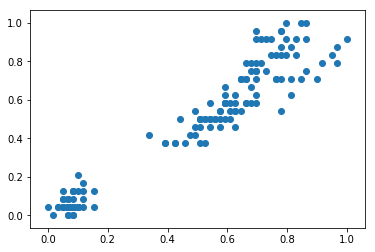

In [45]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [46]:
sse = []
k_rng = range(1,10)
for i in k_rng:
    km = KMeans(i)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

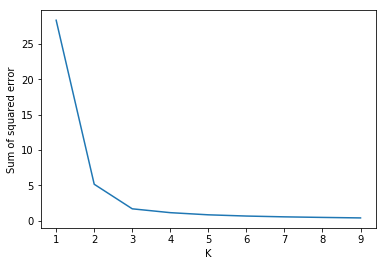

In [47]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [48]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predict


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
df['cluster'] = y_predict
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [50]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

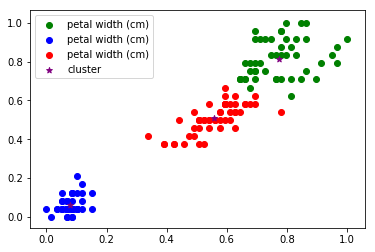

In [51]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], label='cluster', color='purple', marker='*')
plt.legend()